In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.optimizers import rmsprop, adam
from keras.callbacks import TensorBoard, ModelCheckpoint

Using TensorFlow backend.


In [2]:
from pathlib import Path
dataset_dir = Path(r"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate")

In [3]:

(width, height)=(6,6)

def load_dataset(dataset_dir):
    data = []
    labels = []
    names=[]

    for sub_dir in dataset_dir.iterdir():
        for img_path in sub_dir.iterdir():
            img = (Image.open(img_path))
            img = img.resize((width, height)) #ファイルサイズが294×294　→ 6×6に変換

            img = np.array(img) #イメージデータをnp.arrayに変換
            label = sub_dir.name #ディレクトリ名をラベルにする

            file_names = os.path.basename(img_path)
            
            data.append(img)
            labels.append(label)
            names.append(file_names)

    return np.array(data), np.array(labels), np.array(names) #np.arrayのデータとラベルを作成


In [4]:
X,y,n = load_dataset(dataset_dir)

In [5]:
X.shape

(668, 6, 6, 4)

In [6]:
y.shape

(668,)

In [7]:
n

array(['180_matrix_One_0.png', '180_matrix_One_10.png',
       '180_matrix_One_12.png', '180_matrix_One_13.png',
       '180_matrix_One_15.png', '180_matrix_One_19.png',
       '180_matrix_One_2.png', '180_matrix_One_20.png',
       '180_matrix_One_21.png', '180_matrix_One_22.png',
       '180_matrix_One_23.png', '180_matrix_One_25.png',
       '180_matrix_One_26.png', '180_matrix_One_27.png',
       '180_matrix_One_3.png', '180_matrix_One_30.png',
       '180_matrix_One_31.png', '180_matrix_One_32.png',
       '180_matrix_One_33.png', '180_matrix_One_34.png',
       '180_matrix_One_35.png', '180_matrix_One_37.png',
       '180_matrix_One_39.png', '180_matrix_One_4.png',
       '180_matrix_One_41.png', '180_matrix_One_42.png',
       '180_matrix_One_44.png', '180_matrix_One_48.png',
       '180_matrix_One_49.png', '180_matrix_One_5.png',
       '180_matrix_One_50.png', '180_matrix_One_54.png',
       '180_matrix_One_55.png', '180_matrix_One_56.png',
       '180_matrix_One_57.png', '180

ラベル： 180_matrix_One_0.png
ラベル： 180_matrix_One_10.png
ラベル： 180_matrix_One_12.png
ラベル： 180_matrix_One_13.png
ラベル： 180_matrix_One_15.png
ラベル： 180_matrix_One_19.png
ラベル： 180_matrix_One_2.png
ラベル： 180_matrix_One_20.png
ラベル： 180_matrix_One_21.png
ラベル： 180_matrix_One_22.png


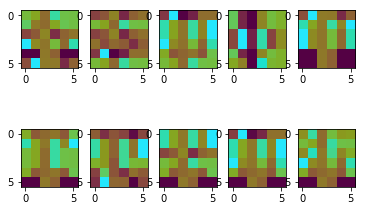

In [8]:
import cv2
for i in range(0, 10):
    print("ラベル：", n[i])
    plt.subplot(2, 5, i+1)
    plt.axis('on')
    #plt.title(label = 'Zero' if y[i] == 0 else 'One')
    img_array = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
plt.show()

In [9]:
model = Sequential()
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="same"))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="same"))
model.add(Flatten())
model.add(Dense(32, input_dim=32, kernel_regularizer=regularizers.l2(0.01))) #regularizer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop', #rmsprop is better loss data
metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
X

array([[[[ 59, 186, 117, 255],
         [ 33, 166, 133, 255],
         [ 46, 107, 142, 255],
         [162, 218,  55, 255],
         [ 71, 192, 110, 255],
         [ 68, 190, 112, 255]],

        [[ 98, 202,  95, 255],
         [ 40, 122, 142, 255],
         [ 46, 107, 142, 255],
         [ 34, 167, 132, 255],
         [ 81, 196, 104, 255],
         [ 68, 190, 112, 255]],

        [[ 63,  69, 135, 255],
         [ 55,  89, 140, 255],
         [ 36, 134, 141, 255],
         [ 70,  45, 124, 255],
         [ 50,  99, 141, 255],
         [ 43, 115, 142, 255]],

        [[253, 231,  36, 255],
         [ 34, 138, 141, 255],
         [ 42, 117, 142, 255],
         [ 59, 186, 117, 255],
         [ 47, 105, 141, 255],
         [175, 220,  46, 255]],

        [[ 68,   1,  84, 255],
         [ 68,   1,  84, 255],
         [ 41, 120, 142, 255],
         [ 51,  97, 141, 255],
         [ 68,   1,  84, 255],
         [ 68,   1,  84, 255]],

        [[ 60,  78, 138, 255],
         [253, 231,  36, 255]

In [15]:
Xa=X[:,:,:,:3]
print(XX.shape)

NameError: name 'XX' is not defined

In [16]:
Xa

array([[[[ 59, 186, 117],
         [ 33, 166, 133],
         [ 46, 107, 142],
         [162, 218,  55],
         [ 71, 192, 110],
         [ 68, 190, 112]],

        [[ 98, 202,  95],
         [ 40, 122, 142],
         [ 46, 107, 142],
         [ 34, 167, 132],
         [ 81, 196, 104],
         [ 68, 190, 112]],

        [[ 63,  69, 135],
         [ 55,  89, 140],
         [ 36, 134, 141],
         [ 70,  45, 124],
         [ 50,  99, 141],
         [ 43, 115, 142]],

        [[253, 231,  36],
         [ 34, 138, 141],
         [ 42, 117, 142],
         [ 59, 186, 117],
         [ 47, 105, 141],
         [175, 220,  46]],

        [[ 68,   1,  84],
         [ 68,   1,  84],
         [ 41, 120, 142],
         [ 51,  97, 141],
         [ 68,   1,  84],
         [ 68,   1,  84]],

        [[ 60,  78, 138],
         [253, 231,  36],
         [ 40, 122, 142],
         [ 41, 120, 142],
         [ 71,  42, 121],
         [ 51,  97, 141]]],


       [[[ 65,  65, 134],
         [ 57,  85, 139]

In [17]:
Xb = Xa.astype("float32")
Xb = Xa / 255  # [0, 1] にする。

In [18]:
Xb

array([[[[0.23137255, 0.72941176, 0.45882353],
         [0.12941176, 0.65098039, 0.52156863],
         [0.18039216, 0.41960784, 0.55686275],
         [0.63529412, 0.85490196, 0.21568627],
         [0.27843137, 0.75294118, 0.43137255],
         [0.26666667, 0.74509804, 0.43921569]],

        [[0.38431373, 0.79215686, 0.37254902],
         [0.15686275, 0.47843137, 0.55686275],
         [0.18039216, 0.41960784, 0.55686275],
         [0.13333333, 0.65490196, 0.51764706],
         [0.31764706, 0.76862745, 0.40784314],
         [0.26666667, 0.74509804, 0.43921569]],

        [[0.24705882, 0.27058824, 0.52941176],
         [0.21568627, 0.34901961, 0.54901961],
         [0.14117647, 0.5254902 , 0.55294118],
         [0.2745098 , 0.17647059, 0.48627451],
         [0.19607843, 0.38823529, 0.55294118],
         [0.16862745, 0.45098039, 0.55686275]],

        [[0.99215686, 0.90588235, 0.14117647],
         [0.13333333, 0.54117647, 0.55294118],
         [0.16470588, 0.45882353, 0.55686275],
       

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(Xb, y, test_size=0.3, random_state=1)

In [21]:
X_train.shape

(467, 6, 6, 3)

In [22]:
y_train

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,

In [32]:
model.fit(X_train, y_train, batch_size=128, epochs=200, validation_split=0.3)

Train on 326 samples, validate on 141 samples
Epoch 1/200
326/326 [==============================] - 0s 28us/step - loss: 0.9635 - acc: 0.8006 - val_loss: 0.8003 - val_acc: 0.7305
Epoch 2/200
326/326 [==============================] - 0s 28us/step - loss: 0.6076 - acc: 0.7761 - val_loss: 0.6393 - val_acc: 0.7589
Epoch 3/200
326/326 [==============================] - 0s 28us/step - loss: 0.5306 - acc: 0.8006 - val_loss: 0.6064 - val_acc: 0.7660
Epoch 4/200
326/326 [==============================] - 0s 28us/step - loss: 0.4378 - acc: 0.8098 - val_loss: 0.5312 - val_acc: 0.8014
Epoch 5/200
326/326 [==============================] - 0s 25us/step - loss: 0.4265 - acc: 0.8098 - val_loss: 0.5413 - val_acc: 0.7801
Epoch 6/200
326/326 [==============================] - 0s 27us/step - loss: 0.4213 - acc: 0.8405 - val_loss: 0.5160 - val_acc: 0.8014
Epoch 7/200
326/326 [==============================] - 0s 28us/step - loss: 0.3725 - acc: 0.8374 - val_loss: 0.5350 - val_acc: 0.7801
Epoch 8/200
326/

Epoch 61/200
326/326 [==============================] - 0s 24us/step - loss: 0.1651 - acc: 0.9356 - val_loss: 1.0938 - val_acc: 0.7376
Epoch 62/200
326/326 [==============================] - 0s 28us/step - loss: 0.2096 - acc: 0.9049 - val_loss: 0.8018 - val_acc: 0.7305
Epoch 63/200
326/326 [==============================] - 0s 24us/step - loss: 0.2299 - acc: 0.9080 - val_loss: 0.7405 - val_acc: 0.7447
Epoch 64/200
326/326 [==============================] - 0s 21us/step - loss: 0.1341 - acc: 0.9540 - val_loss: 0.8859 - val_acc: 0.7801
Epoch 65/200
326/326 [==============================] - 0s 24us/step - loss: 0.1239 - acc: 0.9693 - val_loss: 0.8944 - val_acc: 0.7447
Epoch 66/200
326/326 [==============================] - 0s 24us/step - loss: 0.3533 - acc: 0.8558 - val_loss: 1.0042 - val_acc: 0.7518
Epoch 67/200
326/326 [==============================] - 0s 28us/step - loss: 0.1989 - acc: 0.9387 - val_loss: 0.7629 - val_acc: 0.7518
Epoch 68/200
326/326 [==============================] -

326/326 [==============================] - 0s 24us/step - loss: 0.0602 - acc: 0.9969 - val_loss: 1.2456 - val_acc: 0.7660
Epoch 182/200
326/326 [==============================] - 0s 24us/step - loss: 0.0628 - acc: 0.9939 - val_loss: 1.4974 - val_acc: 0.7518
Epoch 183/200
326/326 [==============================] - 0s 28us/step - loss: 0.3516 - acc: 0.8589 - val_loss: 0.9963 - val_acc: 0.7518
Epoch 184/200
326/326 [==============================] - 0s 27us/step - loss: 0.1002 - acc: 0.9785 - val_loss: 1.0522 - val_acc: 0.7376
Epoch 185/200
326/326 [==============================] - 0s 24us/step - loss: 0.0652 - acc: 0.9939 - val_loss: 1.1262 - val_acc: 0.7589
Epoch 186/200
326/326 [==============================] - 0s 24us/step - loss: 0.0592 - acc: 0.9969 - val_loss: 1.1818 - val_acc: 0.7660
Epoch 187/200
326/326 [==============================] - 0s 24us/step - loss: 0.0604 - acc: 0.9969 - val_loss: 1.2509 - val_acc: 0.7660
Epoch 188/200
326/326 [==============================] - 0s 24

In [33]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
loss_and_metrics

201/201 [==============================] - 0s 15us/step


[0.9859883322644589, 0.7810945252874004]

In [29]:
classes = model.predict(X_test, batch_size=128)

In [30]:
classes*100

array([[4.3511391e-04],
       [9.9999825e+01],
       [2.0805001e-02],
       [3.5634637e-02],
       [9.9999771e+01],
       [9.9983879e+01],
       [2.2825599e-02],
       [8.1753731e-02],
       [9.0052284e+01],
       [2.3841858e-05],
       [9.9206337e+01],
       [1.7373264e-01],
       [1.4603138e-04],
       [4.0975213e-02],
       [9.5878326e+01],
       [4.2093992e-01],
       [3.1411648e-03],
       [1.8054515e+00],
       [1.7881393e-05],
       [9.9998734e+01],
       [8.3446503e-05],
       [0.0000000e+00],
       [7.5296577e+01],
       [7.1168579e+01],
       [9.9662262e+01],
       [0.0000000e+00],
       [0.0000000e+00],
       [4.7233105e-01],
       [2.9090912e+01],
       [9.9810318e+01],
       [5.2756369e-01],
       [9.0553490e+01],
       [6.3902438e-01],
       [4.4405460e-04],
       [9.9841118e+01],
       [4.6212375e-01],
       [9.4842315e-01],
       [1.4603138e-03],
       [9.9985161e+01],
       [2.2475117e+01],
       [8.9544058e-02],
       [3.516674

In [25]:
y_test

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0], dtype=int64)